<h1 style="font-family: fantasy; font-size: 4rem; display: flex; justify-content: center; padding-bottom: 1rem">Mobile Price Classification</h1>

# Initializing the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./train.csv')

### Taking overview of the dataset

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0.0,NaN,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021,1,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563,1,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615,1,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821,1,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965,1,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911,0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512,0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


In [4]:
df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0.0,8.0,1.0,36.0,0.8,85.0,1.0,...,743.0,1426.0,296.0,5.0,3.0,7.0,1.0,0.0,0.0,0
1991,1882,0,2.0,0.0,11.0,1.0,44.0,0.8,113.0,8.0,...,4.0,743.0,3579.0,19.0,8.0,20.0,1.0,1.0,0.0,3
1992,674,1,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,...,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0
1993,1467,1,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,...,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3
1994,858,0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,...,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3
1995,794,1,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965,1,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911,0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512,0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0
1999,510,1,2.0,1.0,5.0,1.0,45.0,0.9,168.0,NaN,...,483.0,754.0,NaN,19.0,4.0,2.0,1.0,1.0,1.0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1982 non-null   float64
 4   fc             1971 non-null   float64
 5   four_g         1975 non-null   float64
 6   int_memory     1983 non-null   float64
 7   m_dep          1982 non-null   float64
 8   mobile_wt      1979 non-null   float64
 9   n_cores        1982 non-null   float64
 10  pc             1988 non-null   float64
 11  px_height      1983 non-null   float64
 12  px_width       1982 non-null   float64
 13  ram            1979 non-null   float64
 14  sc_h           1973 non-null   float64
 15  sc_w           1982 non-null   float64
 16  talk_time      1985 non-null   float64
 17  three_g        1991 non-null   float64
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,1991.000000,1982.000000,1971.000000,1975.000000,1983.000000,1982.000000,1979.000000,1982.000000,...,1983.000000,1982.000000,1979.000000,1973.000000,1982.000000,1985.000000,1991.000000,1991.000000,1994.000000,2000.000000
mean,1238.518500,0.4950,1.520844,0.510595,4.307458,0.518987,32.023197,0.502119,140.152602,4.523713,...,644.248613,1251.116044,2124.439111,12.305119,5.767407,11.014610,0.760422,0.502762,0.506520,1.500000
std,439.418206,0.5001,0.816151,0.500014,4.345818,0.499766,18.155108,0.288332,35.358355,2.286451,...,443.650210,431.670630,1084.156457,4.213154,4.363342,5.466198,0.426933,0.500118,0.500083,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,281.000000,874.250000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.500000,1630.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking if the dataframe has any null value that needs to be rectified

In [7]:
df.isna().sum()

battery_power     0
blue              0
clock_speed       9
dual_sim         18
fc               29
four_g           25
int_memory       17
m_dep            18
mobile_wt        21
n_cores          18
pc               12
px_height        17
px_width         18
ram              21
sc_h             27
sc_w             18
talk_time        15
three_g           9
touch_screen      9
wifi              6
price_range       0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0] * 100
#represents the percentage of null values

battery_power    0.00
blue             0.00
clock_speed      0.45
dual_sim         0.90
fc               1.45
four_g           1.25
int_memory       0.85
m_dep            0.90
mobile_wt        1.05
n_cores          0.90
pc               0.60
px_height        0.85
px_width         0.90
ram              1.05
sc_h             1.35
sc_w             0.90
talk_time        0.75
three_g          0.45
touch_screen     0.45
wifi             0.30
price_range      0.00
dtype: float64

We can see there are a few NaN values present in the database so, we need to clean those empty values and replace them mean/median values which can be decided based on analysis as shown below

# Cleaning and Filtering of dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing the trends in data using graphs

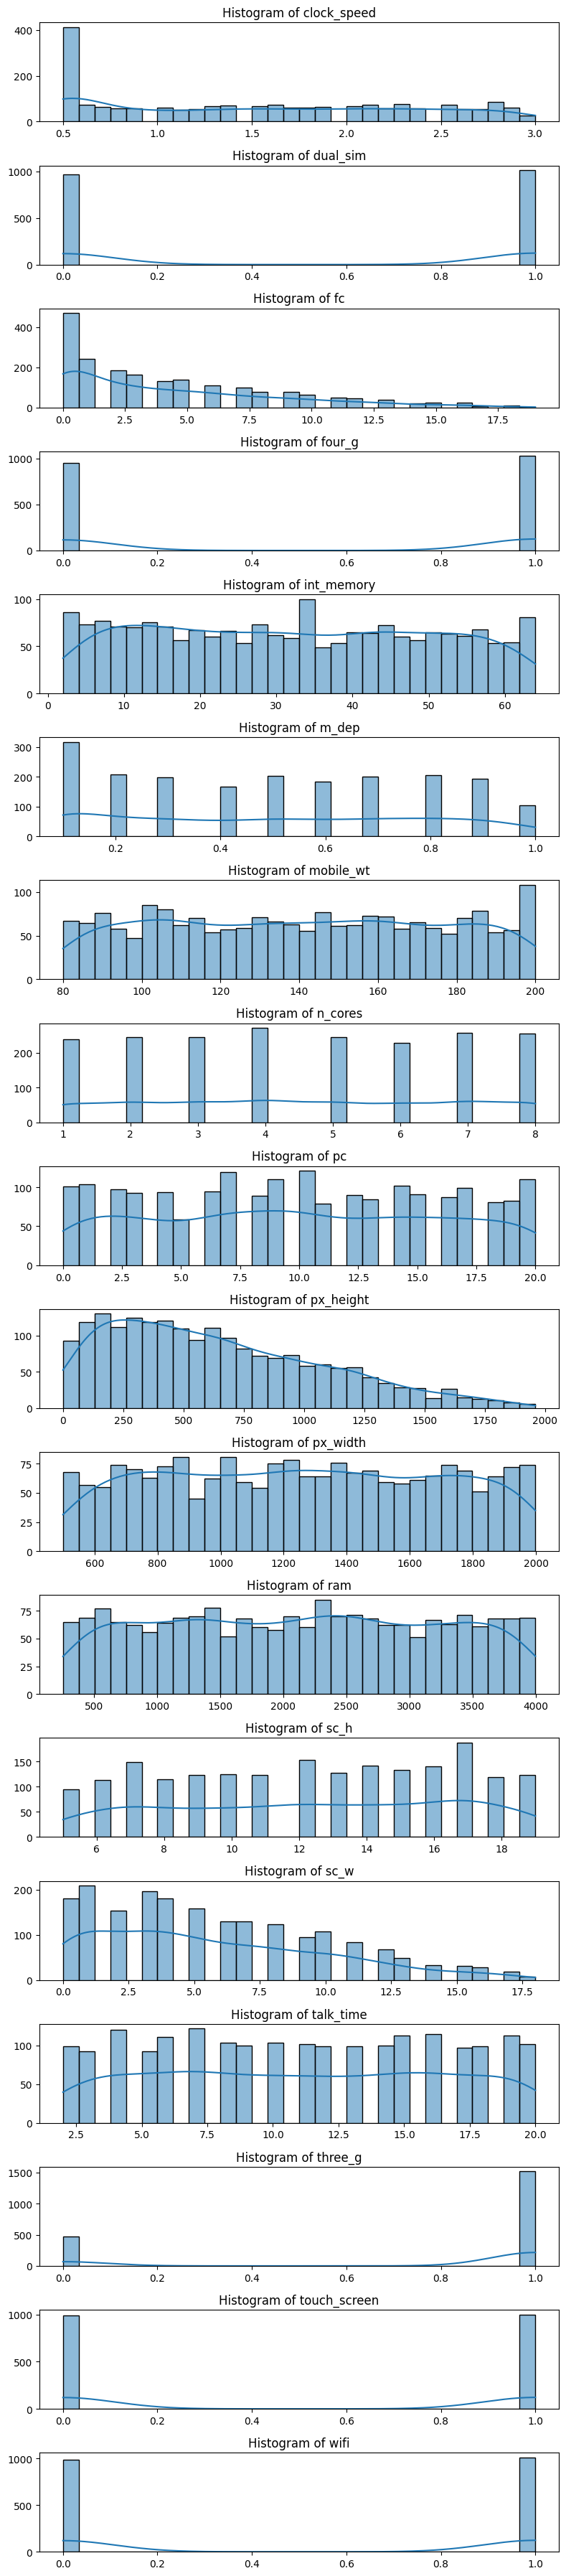

In [10]:
features_to_plot = ['clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(8, 2 * len(features_to_plot)))

# Plot histograms for each feature
for i, feature in enumerate(features_to_plot):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Here we are focusing on calculating the skewness of the graph for all the columns to be able to decide whether to replace the empty data with mean or median value of that particular column

### Replacing NaN values

In [11]:
skewness=df.skew()
skewness

battery_power    0.031898
blue             0.020016
clock_speed      0.180232
dual_sim        -0.042423
fc               1.022288
four_g          -0.076062
int_memory       0.059443
m_dep            0.087083
mobile_wt        0.008932
n_cores          0.003211
pc               0.019455
px_height        0.663989
px_width         0.013353
ram              0.005373
sc_h            -0.096529
sc_w             0.630893
talk_time        0.010172
three_g         -1.221192
touch_screen    -0.011058
wifi            -0.026100
price_range      0.000000
dtype: float64

For normalized ones we replace with mean and others with median.

**taking 0.5 as skew_threshold**

Considering columns with |skewness| > 0.5 as skewed and |skewness| < 0.5 as normalized

Replacing the following columns with their respective mean/median values
<ul>
 <li> <b>median</b> -> fc, px_height, sc_w, three_g</li>
 <li> <b>mean</b> -> clock_speed, dual_sim, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_width, ram, sc_h, talk_time, touch_screen, wifi</li>
</ul>



In [12]:
replace_columns=features_to_plot

skew_threshold = 0.5

for col in replace_columns:
    if df[col].isnull().any():  #check if at least one True is present in the Boolean mask
        if abs(skewness[col]) > skew_threshold:
            # highly-skewed data, replace with median
            df[col].fillna(df[col].median(), inplace=True)
        elif abs(skewness[col]) < skew_threshold:
            # normalized data, replace with mean
            df[col].fillna(df[col].mean(), inplace=True)


Checking if all the NaN values are replaced

In [13]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Here we can see all the NaN values are successfullyu replaced and there are no more empty values in the dataframe.<br>
Hence we can now proceed further to data exploration and analysis to train the model accordingly

# Data Exploration / Analysis

### Let us check the correlation between the values to the phone's price range.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

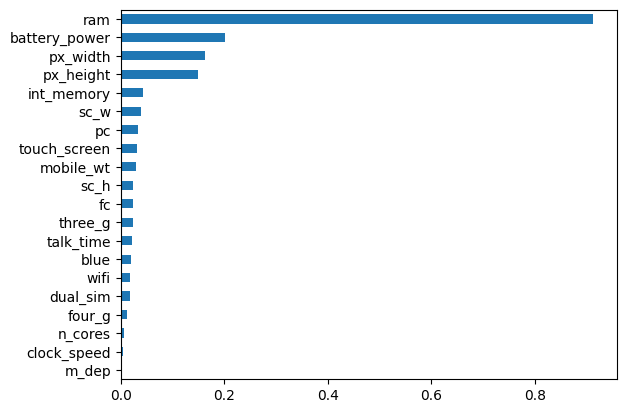

In [15]:
corr_arr = []
name_arr = []


for col in range(len(df.columns)):
    if df.columns[col] == "price_range":
        continue

    name_arr.append(df.columns[col])

    corr = df.corr()["price_range"][col]
    if corr < 0: corr *= -1
    corr_arr.append(corr)

pd.Series(corr_arr, name_arr).sort_values().plot(kind="barh");

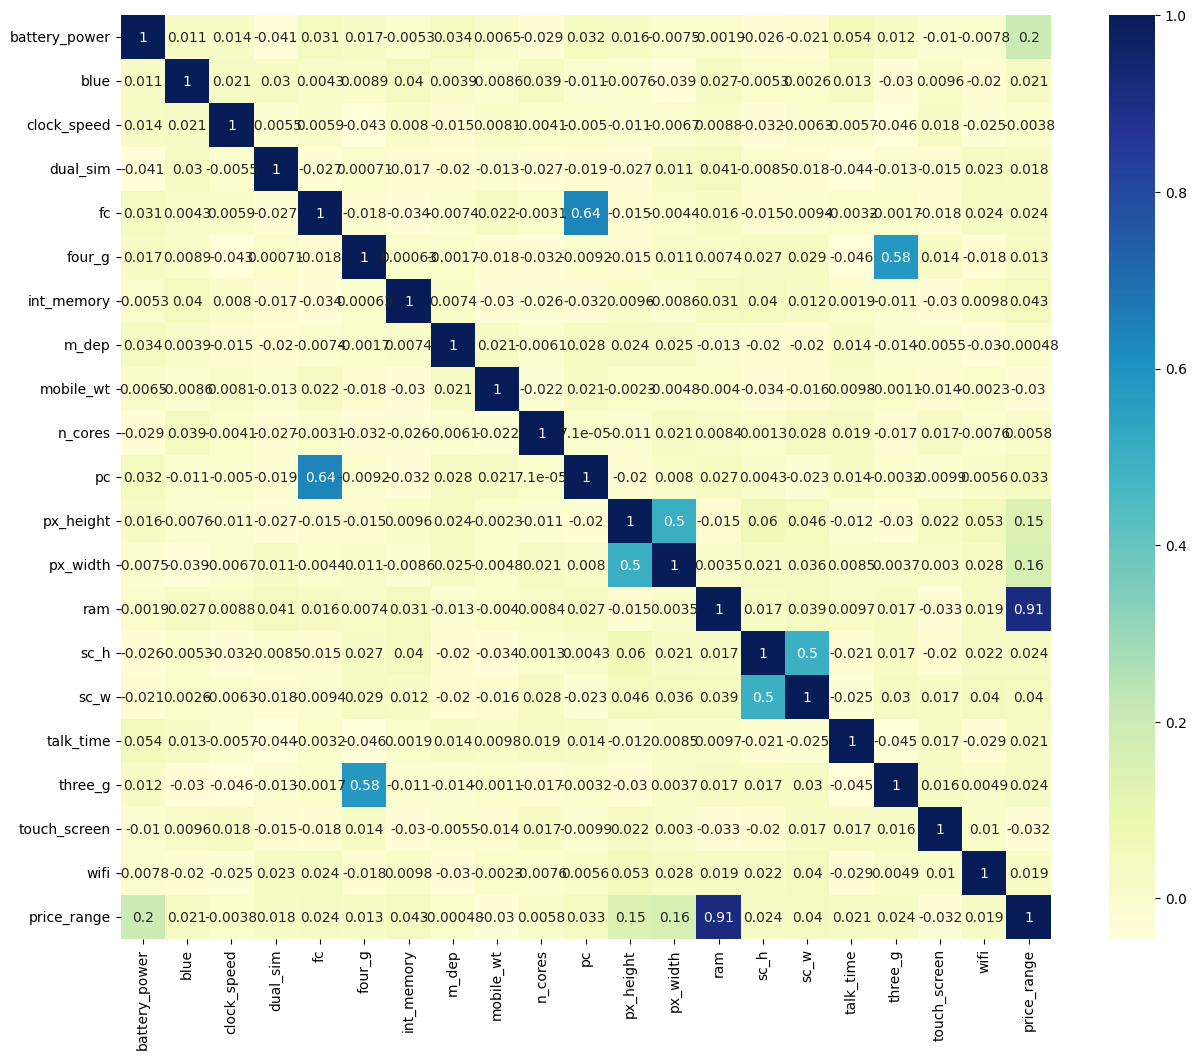

In [16]:
plt.figure(figsize=(15,12))
r = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

These values have the highest correlation to price:
<ol>
    <li> ram</li>
    <li> battery power</li>
    <li> screen dimensions</li>
    <li> internal memory</li>
</ol>

### How Ram affects price

<Axes: xlabel='price_range', ylabel='ram'>

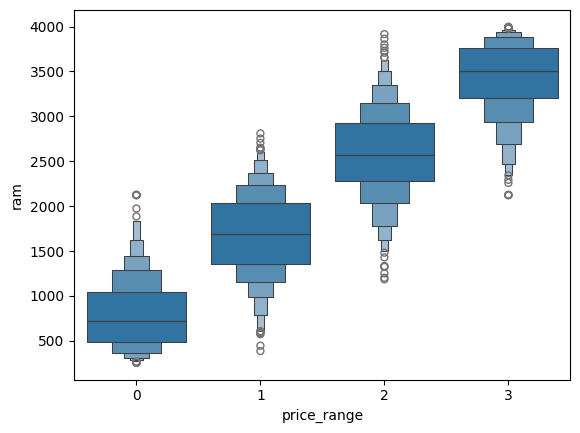

In [17]:
sns.boxenplot(data=df, y="ram", x="price_range")

<Axes: xlabel='price_range', ylabel='ram'>

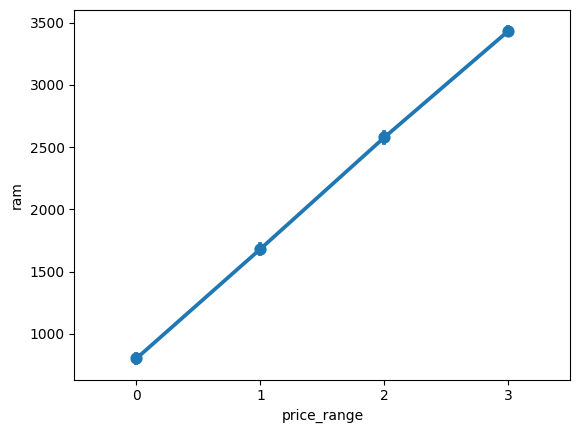

In [18]:
sns.pointplot(data=df, y="ram", x="price_range")

We can see ***as the ram goes higher, so does the price range***.<br>
Ram greatly affects the price of the mobile device.

### How Internal Memory affects price range

<Axes: xlabel='price_range', ylabel='int_memory'>

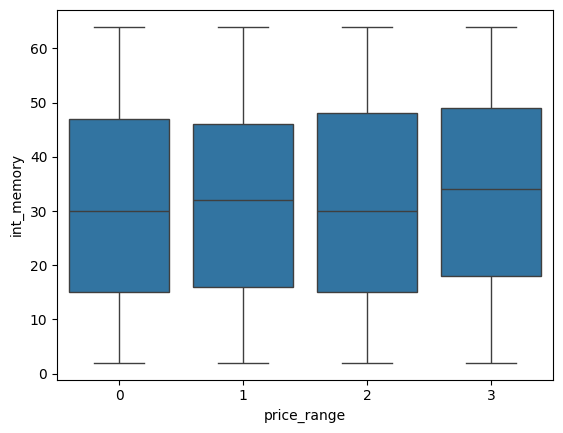

In [19]:
sns.boxplot(data=df, y="int_memory", x="price_range")

<Axes: xlabel='price_range', ylabel='int_memory'>

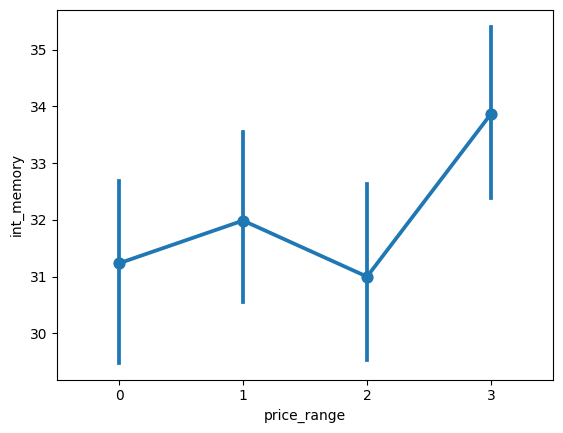

In [20]:
sns.pointplot(data=df, y="int_memory", x="price_range")

The ***price range seems to dip*** for price range 2

### How Battery power affects price range

<Axes: xlabel='price_range', ylabel='battery_power'>

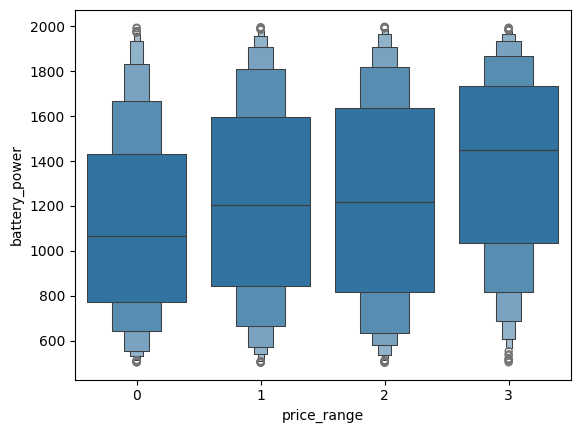

In [21]:
sns.boxenplot(data=df, y="battery_power", x="price_range")

<Axes: xlabel='price_range', ylabel='battery_power'>

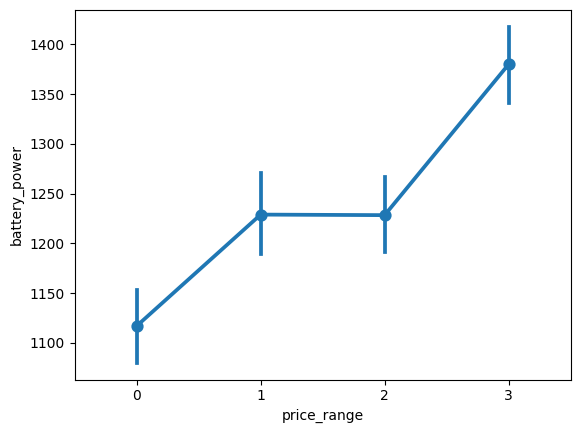

In [22]:
sns.pointplot(data=df, y="battery_power", x="price_range")

***Battery power affects price range***

# Machine Learning

### Seperating 'price_range' column from input dataframe to feed them seperately into the model

In [23]:
y=df['price_range']
X=df.drop('price_range', axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0.0,3.0,0.0,7.0,0.6,188.0,2.000000,2.0,20.0,756.0,2549.000000,9.0,7.0,19.0,0.0,0.0,1.0
1,1021,1,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.000000,6.0,905.0,1988.0,2631.000000,17.0,3.0,7.0,1.0,1.0,0.0
2,563,1,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.000000,6.0,1263.0,1716.0,2603.000000,11.0,2.0,9.0,1.0,1.0,0.0
3,615,1,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.000000,9.0,1216.0,1786.0,2769.000000,16.0,8.0,11.0,1.0,0.0,0.0
4,1821,1,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.000000,14.0,1208.0,1212.0,1411.000000,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.000000,14.0,1222.0,1890.0,668.000000,13.0,4.0,19.0,1.0,1.0,0.0
1996,1965,1,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.000000,3.0,915.0,1965.0,2032.000000,11.0,10.0,16.0,1.0,1.0,1.0
1997,1911,0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.000000,3.0,868.0,1632.0,3057.000000,9.0,1.0,5.0,1.0,1.0,0.0
1998,1512,0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.000000,5.0,336.0,670.0,869.000000,18.0,10.0,19.0,1.0,1.0,1.0


### Split Dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


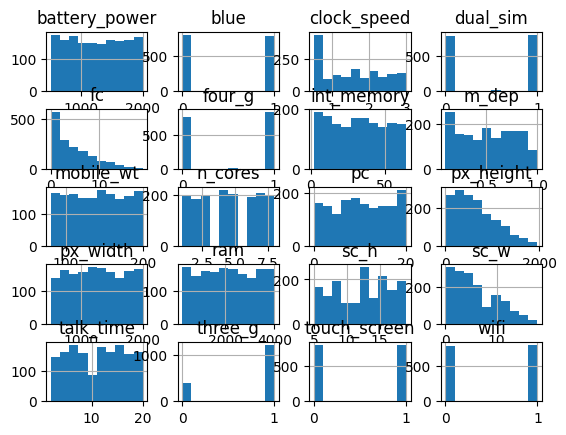

In [25]:
X_train.hist();

### Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
lm_acc=lm.score(X_test,y_test)*100
print("Accuracy: " , lm_acc , "%")

Accuracy:  90.23602399507807 %


### KNN Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
knn_acc=knn.score(X_test,y_test)*100
print("Accuracy: " , knn_acc , "%")

Accuracy:  53.5 %


### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
logmodel_acc=logmodel.score(X_test,y_test)*100
print("Accuracy: " , logmodel_acc , "%")

Accuracy:  93.25 %


### Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
dtree_acc=dtree.score(X_test,y_test)*100
print("Accuracy: " , dtree_acc , "%")

Accuracy:  81.0 %


### XGBoost Model

In [38]:
import xgboost as xgb

# Initialize the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Adjust hyperparameters (n_estimators, learning_rate, max_depth) as needed

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)


In [39]:
# Evaluate the model
from sklearn.metrics import accuracy_score
XGB_acc = accuracy_score(y_test, predictions)*100
print(f"Accuracy: {XGB_acc}%")

Accuracy: 88.0%


### Random Tree Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc_acc=rfc.score(X_test,y_test)*100
print("Accuracy: " , rfc_acc , "%")

Accuracy:  88.0 %


### SVM Model

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

We will define a function that finds the optimal combination of hyperparameters to achieve the best accuracy for our classifier. The function uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects the combination with the highest accuracy. The function returns the best classifier with the optimal hyperparameters and can be used to tune hyperparameters for future models as well:

In [43]:
from sklearn.model_selection import StratifiedKFold


def tune_hyperparameters(clf, param_grid, X_train, y_train):
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

Define the hyperparameters grid for search:

In [44]:
# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'], 
               'degree': [2, 3, 4, 5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['linear'],
               'C': [0.01, 0.1, 1, 10, 100, 1000]}
             ]

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score


def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

Tuning hyperparameters for Support Vector Machines (SVM) can be time-consuming as it involves training the model multiple times with different hyperparameter values and evaluating their performance to find the optimal set of hyperparameters. After tuning SVM hyperparameters once, we found that the linear kernel is the optimal kernel for this dataset. Therefore, we limit our param_grid to the linear kernel to reduce the program's run time:

In [46]:
param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

Let's call tune_hyperparameters function to find the optimal values for the SVM hyperparameters that best fit our data:

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_optimized = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 10, 'kernel': 'linear'}


In [48]:
# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'], 
               'degree': [2, 3, 4, 5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['linear'],
               'C': [0.01, 0.1, 1, 10, 100, 1000]}
             ]

In [49]:
param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

In [50]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_optimized = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 10, 'kernel': 'linear'}


SVM Model Evaluation

First, we define a function that provides a summary of the model's performance on the test data using the desired metrics:

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score


def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

Now we define a function that provides a complete report of the model's performance on the training and test data, plus the confusin_matrix of the model on the test data and the summary of the model performance using the above function:

In [52]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')
              
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
            
    plt.tight_layout()
    plt.show() 



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       406
           1       0.97      0.95      0.96       398
           2       0.96      0.97      0.96       380
           3       0.98      0.98      0.98       416

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.89      0.96      0.92       102
           2       0.95      0.88      0.91       120
           3       0.93      0.96      0.95        84

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94 

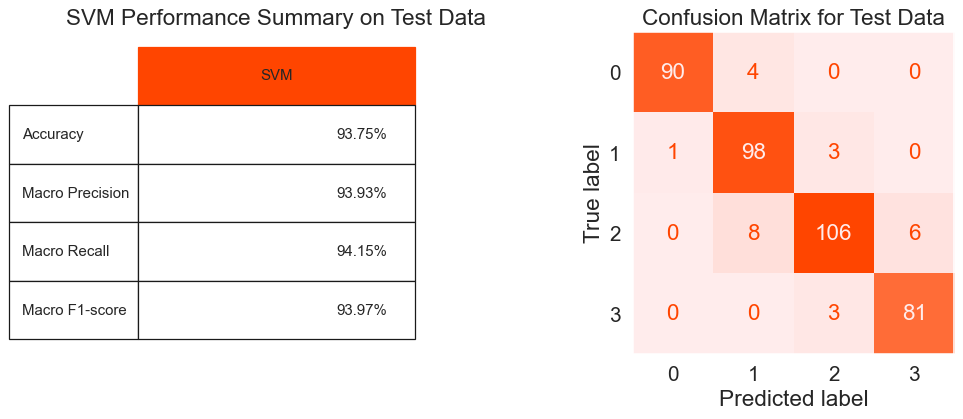

In [54]:
from matplotlib.colors import LinearSegmentedColormap

model_evaluation(svm_optimized, X_train, X_test, y_train, y_test, 'SVM')

# Comparing Models

### We will now compare the scores of the models

In [55]:
model_scores = {"Linear Regression": lm_acc, "Logistic Regression": logmodel_acc, "KNN": knn_acc, "Decision Tree": dtree_acc,"Random Forest Classifier": rfc_acc, "XGBoost": XGB_acc}
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Linear Regression,90.236024
Logistic Regression,93.250000
KNN,53.500000
Decision Tree,81.000000
Random Forest Classifier,88.000000
XGBoost,88.000000


Hence, out of all the models, SVM model preformed best and was able to provide more accurate results

Therefore, we can take SVM model as the reference to predict the values from test dataset 'test.csv'

# Testing the Trained model

### Running the model on 'test.csv' to predict the price_range values according to the dataset

In [56]:
from sklearn.pipeline import Pipeline
# Define the features (X) and the output labels (y) of the given dataset:
X = df.drop('price_range', axis=1)
y = df['price_range'] 

# Create a pipeline to scale the data and train an SVM classifier using obtained optimal hyperparameters
svm_pipeline = Pipeline([
                         ('scaler', StandardScaler()), 
                         ('svm', SVC(probability=True, C=50, kernel='linear', random_state=0)) 
                        ])

# Train the SVM classifier on the whole dataset
svm_pipeline.fit(X, y)

# Read samples
df_test = pd.read_csv('./test.csv')

# Remove id column
#df_samples.drop('id', axis=1, inplace=True)

# Predict samples class
df_test['price_range_pred'] = svm_pipeline.predict(df_test)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_pred
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
